<a href="https://colab.research.google.com/github/LeandroCoelhos/Alzheimer_classification/blob/main/Case_Classifica%C3%A7%C3%A3o_Alzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Leandro Coelho <br>
Data: 17/08/2024 <br>

**Projeto**: [BeeData] - ⚕️ Predição de Alzheimers  🧠

<img src="https://storage.googleapis.com/kaggle-datasets-images/5194699/8668279/0001b5334b7066b8613590d973cd5c2a/dataset-cover.jpg?t=2024-06-11-20-27-30" alt="Descrição da Imagem" width="600">

**Perguntas** 👨‍⚕️<hr>
1. Qual relação binaria algumas variaveis tem com o Alzheimers?
2. Precisamos de ML para detectar Alzheimers?
3. Existe algum grupo de variáveis suficientes para detectar a doença?
4. O que acontece quando incluimos mais variáveis?
5. Quais ganhos podemos ter ao detectar melhor o Alzheimers? Relacionar com erros precision e recall
6. Quais são as variáveis mais importantes na detecção da Doença?
7. Precisamos saber tudo do paciente para realizar um diagnóstico?
8. Como podemos melhorar nosso processo?


<h3>Referência</h3>
Alzheimer's Disease Dataset<br>
<p><a href="https://www.kaggle.com/dsv/8668279">https://www.kaggle.com/dsv/8668279</a>
</p>


# About Dataset









This dataset contains extensive health information for 2,149 patients, each uniquely identified with IDs ranging from 4751 to 6900. The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, cognitive and functional assessments, symptoms, and a diagnosis of Alzheimer's Disease. The data is ideal for researchers and data scientists looking to explore factors associated with Alzheimer's, develop predictive models, and conduct statistical analyses.
Table of Contents

    Patient Information

    Patient ID
    Demographic Details
    Lifestyle Factors

    Medical History
    Clinical Measurements
    Cognitive and Functional Assessments
    Symptoms
    Diagnosis Information
    Confidential Information

Patient Information
Patient ID

    PatientID: A unique identifier assigned to each patient (4751 to 6900).

Demographic Details

    Age: The age of the patients ranges from 60 to 90 years.
    Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
    Ethnicity: The ethnicity of the patients, coded as follows:
    0: Caucasian
    1: African American
    2: Asian
    3: Other
    EducationLevel: The education level of the patients, coded as follows:
    0: None
    1: High School
    2: Bachelor's
    3: Higher

Lifestyle Factors

    BMI: Body Mass Index of the patients, ranging from 15 to 40.
    Smoking: Smoking status, where 0 indicates No and 1 indicates Yes.
    AlcoholConsumption: Weekly alcohol consumption in units, ranging from 0 to 20.
    PhysicalActivity: Weekly physical activity in hours, ranging from 0 to 10.
    DietQuality: Diet quality score, ranging from 0 to 10.
    SleepQuality: Sleep quality score, ranging from 4 to 10.

Medical History

    FamilyHistoryAlzheimers: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
    CardiovascularDisease: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
    Diabetes: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
    Depression: Presence of depression, where 0 indicates No and 1 indicates Yes.
    HeadInjury: History of head injury, where 0 indicates No and 1 indicates Yes.
    Hypertension: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

Clinical Measurements

    SystolicBP: Systolic blood pressure, ranging from 90 to 180 mmHg.
    DiastolicBP: Diastolic blood pressure, ranging from 60 to 120 mmHg.
    CholesterolTotal: Total cholesterol levels, ranging from 150 to 300 mg/dL.
    CholesterolLDL: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
    CholesterolHDL: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
    CholesterolTriglycerides: Triglycerides levels, ranging from 50 to 400 mg/dL.

Cognitive and Functional Assessments

    MMSE: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
    FunctionalAssessment: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
    MemoryComplaints: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
    BehavioralProblems: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
    ADL: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

Symptoms

    Confusion: Presence of confusion, where 0 indicates No and 1 indicates Yes.
    Disorientation: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
    PersonalityChanges: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
    DifficultyCompletingTasks: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
    Forgetfulness: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

Diagnosis Information

    Diagnosis: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

Confidential Information

    DoctorInCharge: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.

Conclusion

This dataset offers extensive insights into the factors associated with Alzheimer's Disease, including demographic, lifestyle, medical, cognitive, and functional variables. It is ideal for developing predictive models, conducting statistical analyses, and exploring the complex interplay of factors contributing to Alzheimer's Disease.

# 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/LeandroCoelhos/Alzheimer_classification/main/alzheimers_disease_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [4]:
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Sem dados Faltantes, conjunto todo numérico, aparenta não ter outliers.

In [5]:
# Retirar coluna sem info
df = df.drop(columns=['DoctorInCharge', 'PatientID'])

# 2. Avaliação Binária de relações com Alzaimer

## 2.1 Distribuição da Variável Resposta

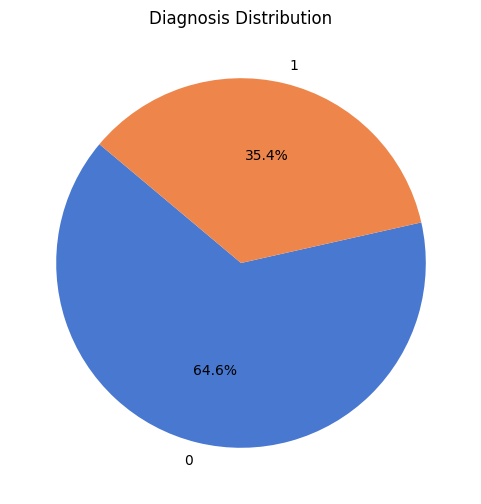

In [6]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

## 2.2 Distribuição de algumas variaveis

Diagnosis


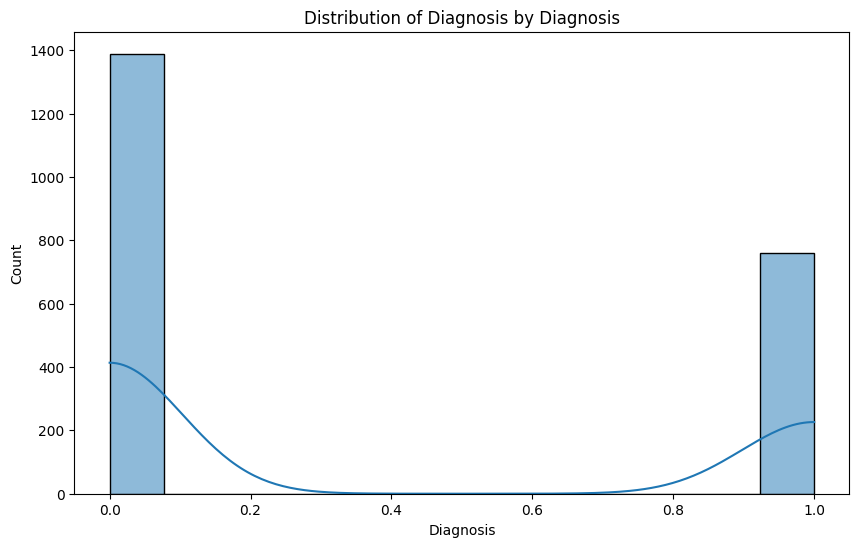

Gender


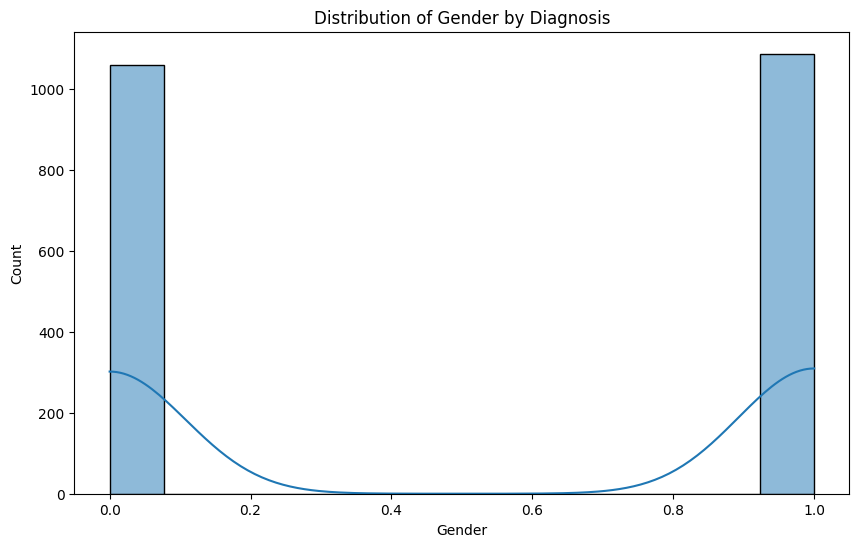

In [7]:
# Criando os gráficos com os valores absolutos
cols = ['Diagnosis', 'Gender']
for col in cols:
  plt.figure(figsize=(10, 6))
  print(col)
  sns.histplot( data=df, x=col, kde=True, stat='count', multiple='dodge')
  plt.title(f'Distribution of {col} by Diagnosis')
  plt.show()

Diagnosis


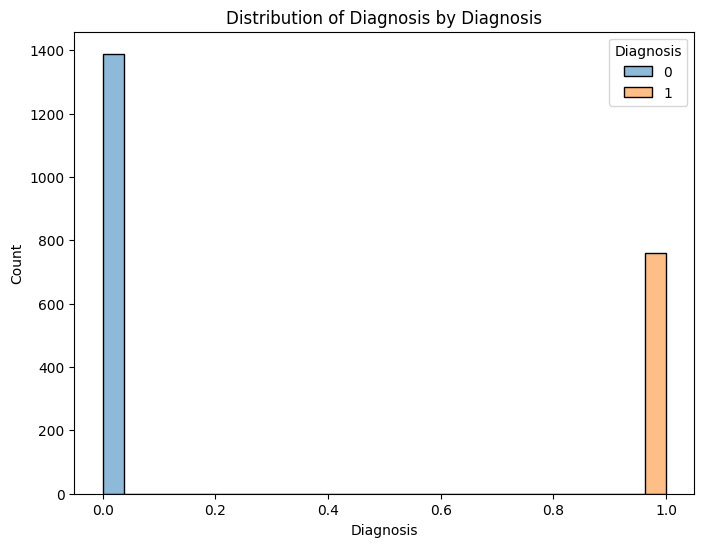

Gender


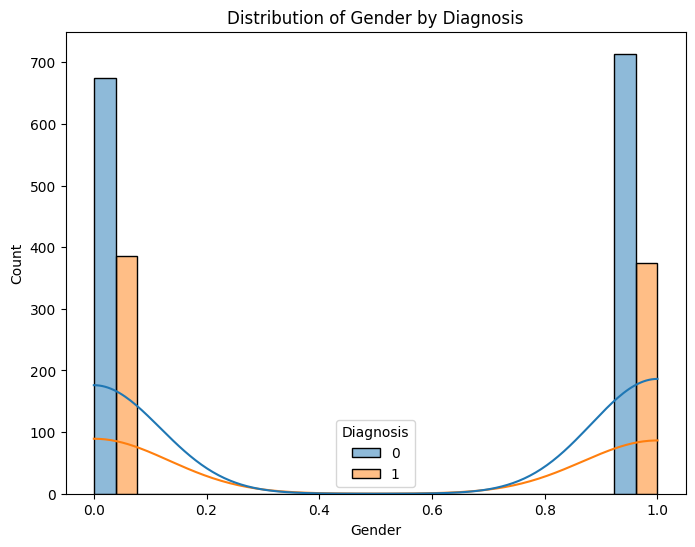

In [8]:
# Criando os gráficos com os valores absolutos
cols = ['Diagnosis', 'Gender']
for col in cols:
  plt.figure(figsize=(8, 6))
  print(col)
  sns.histplot( data=df, x=col, hue='Diagnosis', kde=True, stat='count', multiple='dodge')
  plt.title(f'Distribution of {col} by Diagnosis')
  plt.show()

## 2.3 Distribuições Normalizadas

Diagnosis


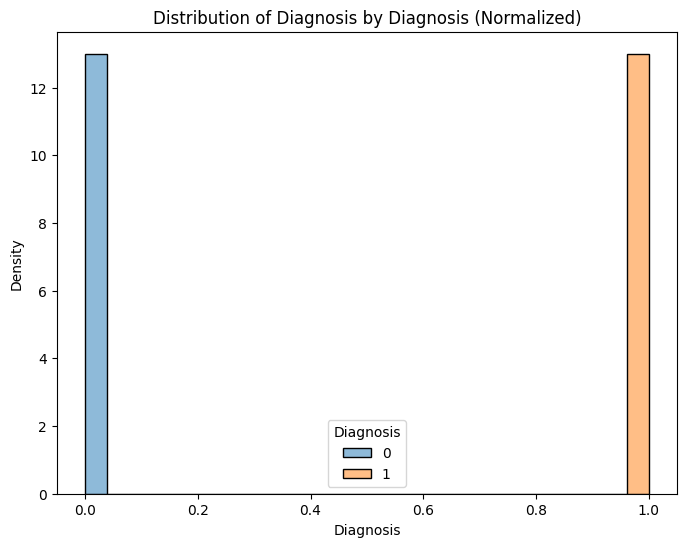

Gender


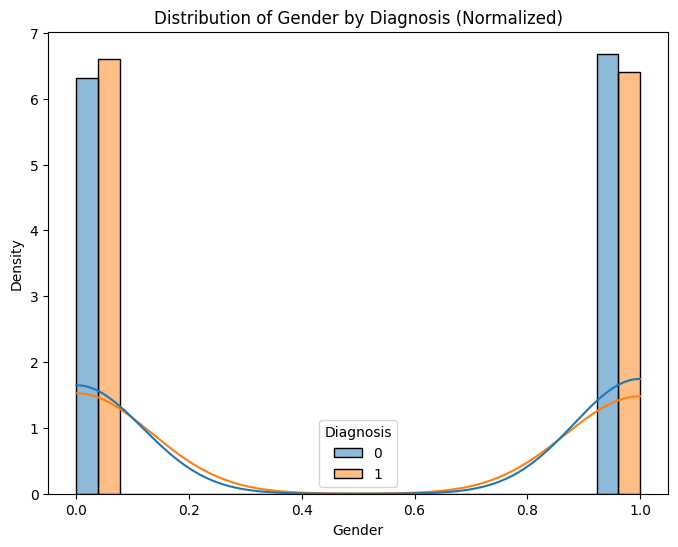

In [9]:
# Criando os gráficos com os valores absolutos
cols = ['Diagnosis', 'Gender']
for col in cols:
  plt.figure(figsize=(8, 6))
  print(col)
  sns.histplot( data=df, x=col, hue='Diagnosis', kde=True, stat='density', common_norm=False,  multiple='dodge' )
  plt.title(f'Distribution of {col} by Diagnosis (Normalized)')
  plt.xlabel(col)
  plt.ylabel('Density')
  plt.show()

## 2.4 Achados Interessantes - Insights

### 2.4.1 Quebra de Paradgmas

Ethnicity


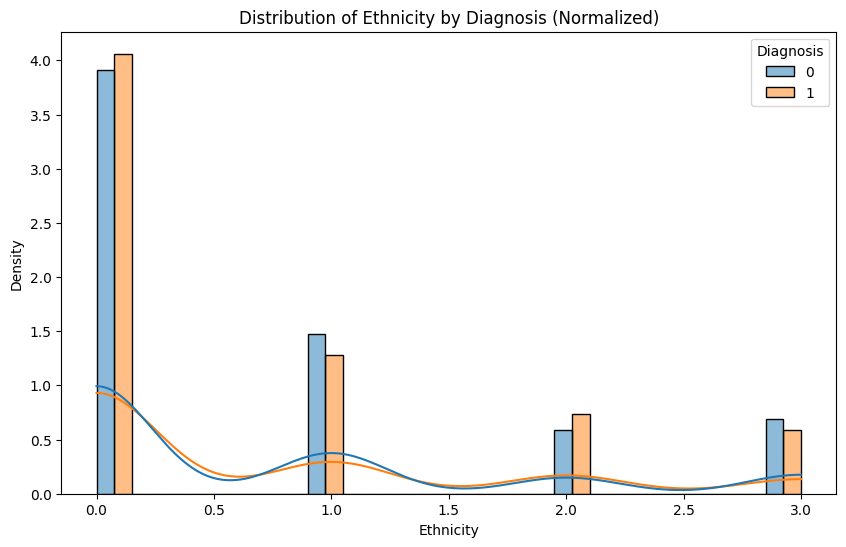

EducationLevel


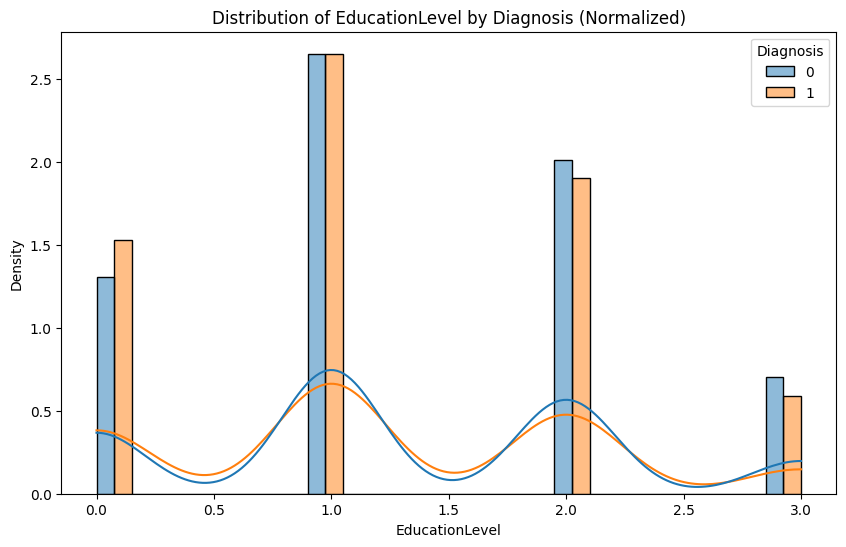

PhysicalActivity


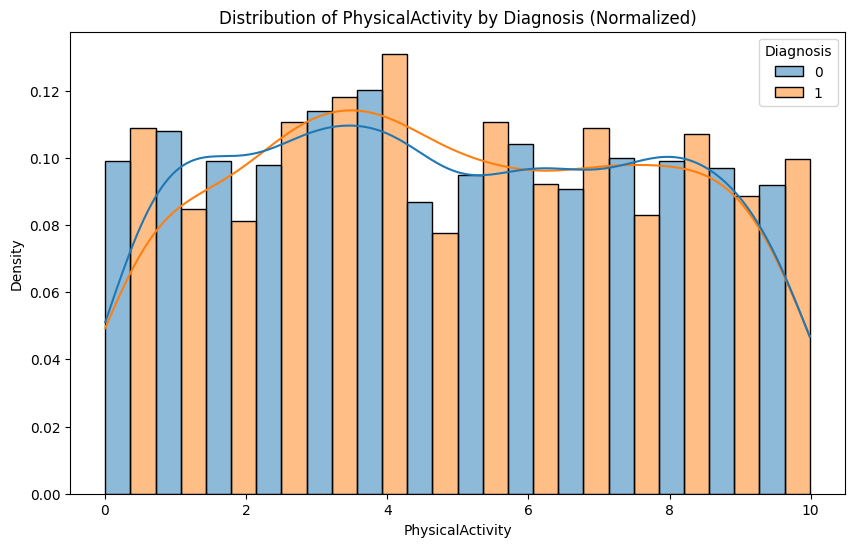

DietQuality


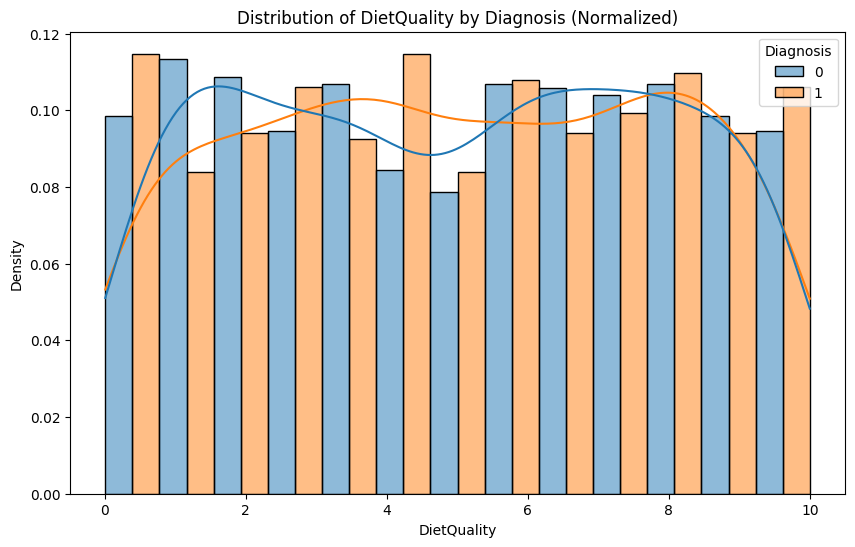

Confusion


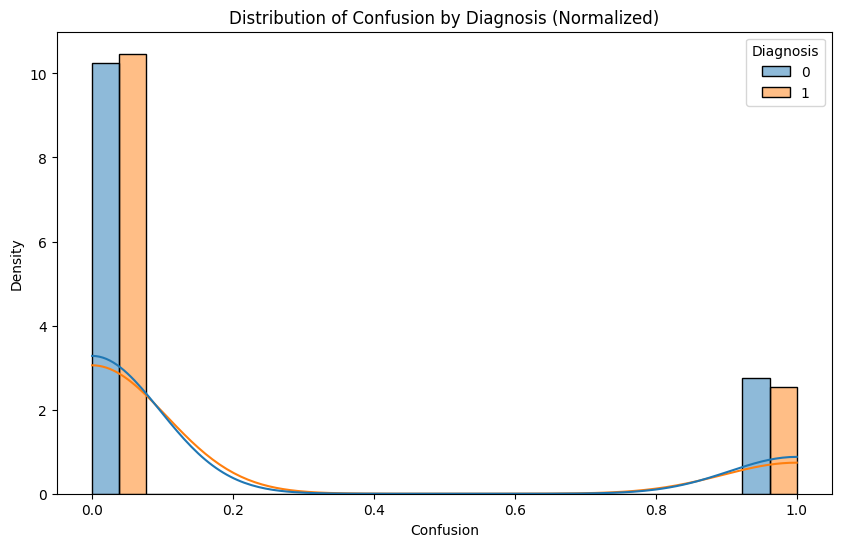

Disorientation


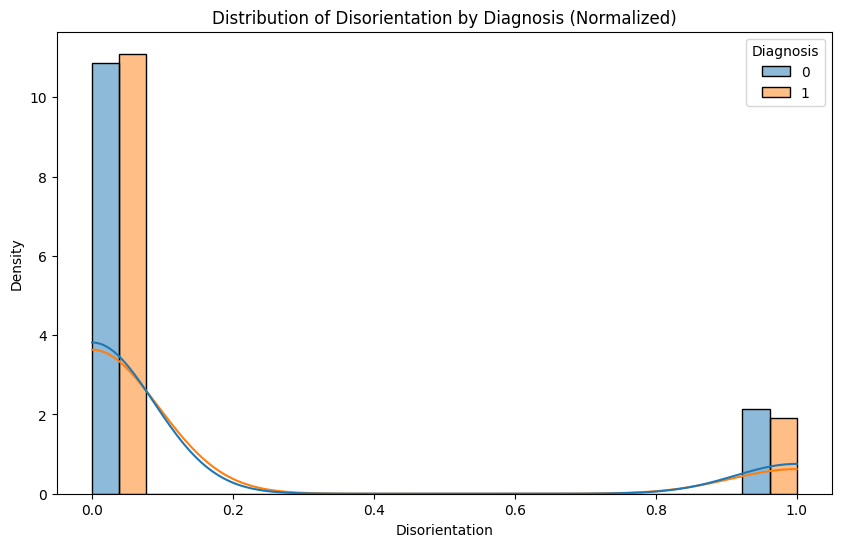

PersonalityChanges


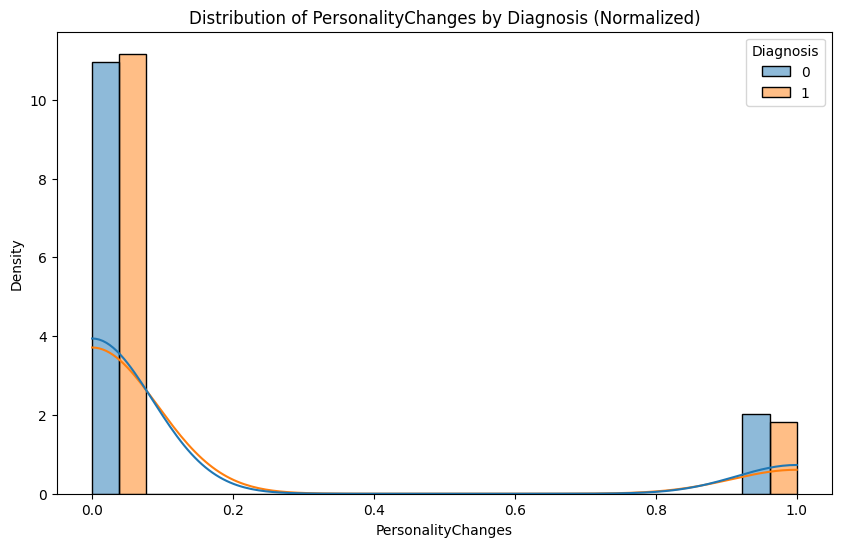

DifficultyCompletingTasks


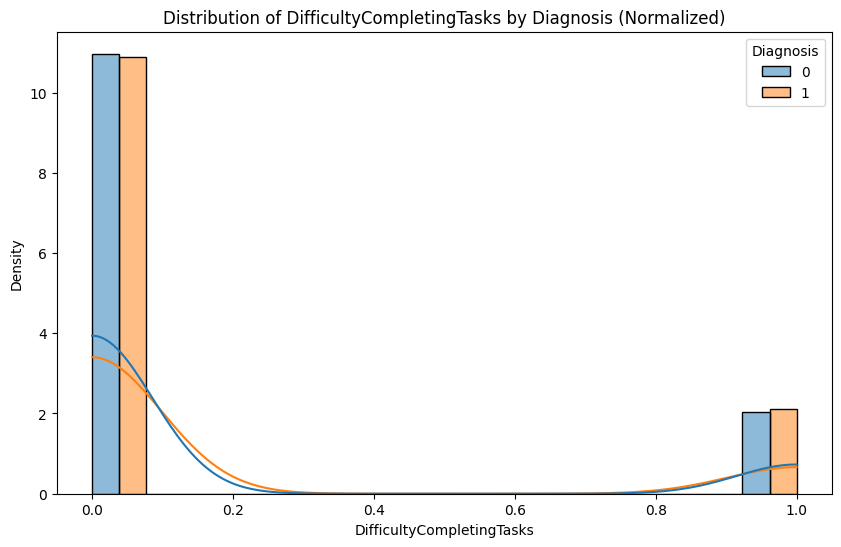

In [10]:
# Criando os gráficos com proporções relativas
cols = ['Ethnicity', 'EducationLevel', 'PhysicalActivity', 'DietQuality', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks']

for col in cols:
    plt.figure(figsize=(10, 6))
    print(col)
    sns.histplot( data=df, x=col, hue='Diagnosis', kde=True, stat='density', common_norm=False,  multiple='dodge' )
    plt.title(f'Distribution of {col} by Diagnosis (Normalized)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

### 2.4.2 Insights

Temos os primeiros indicativos que essas informações estão diretamente ligadas ao diagnósitico de Alzeimer

SleepQuality


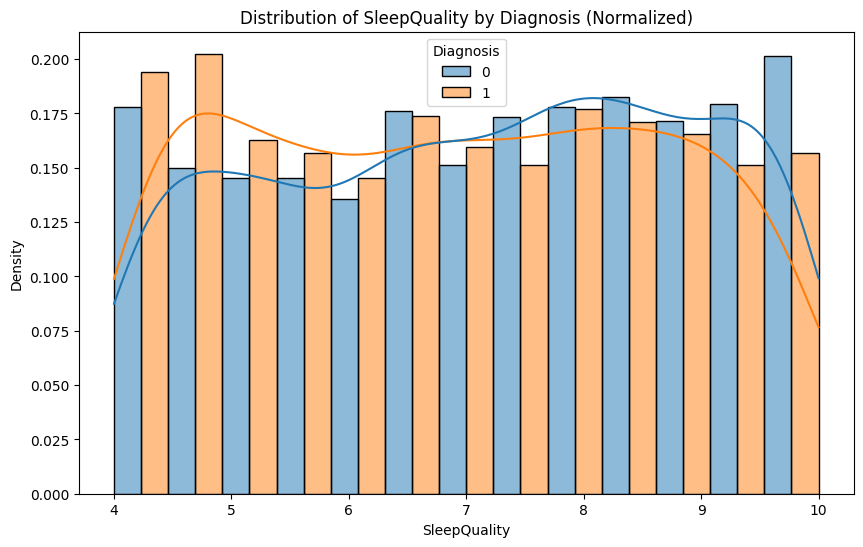

MMSE


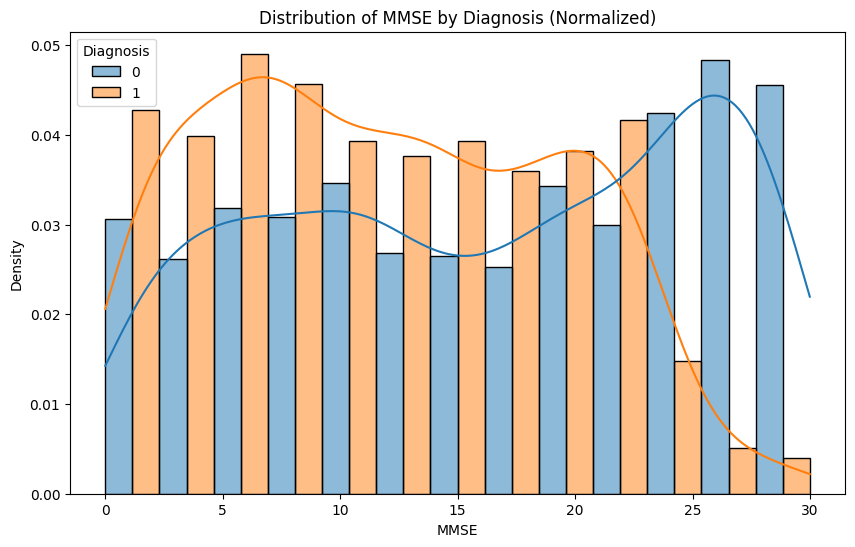

FunctionalAssessment


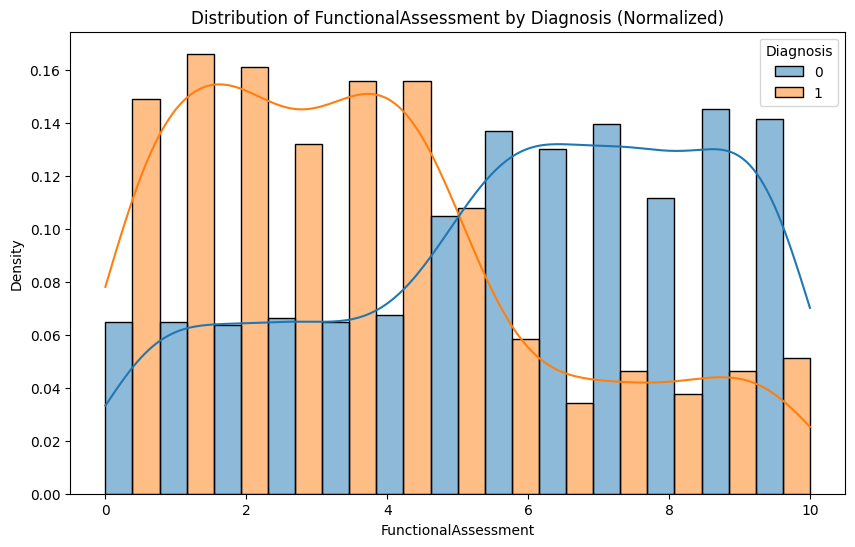

MemoryComplaints


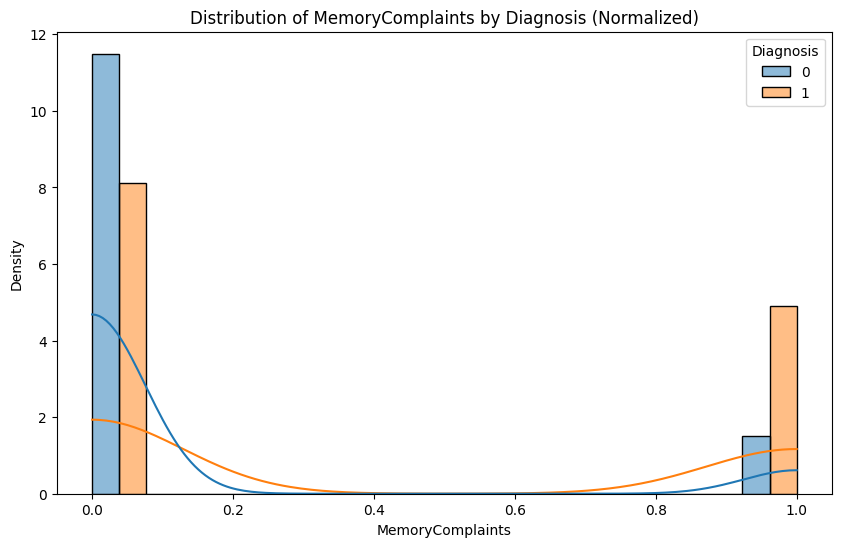

BehavioralProblems


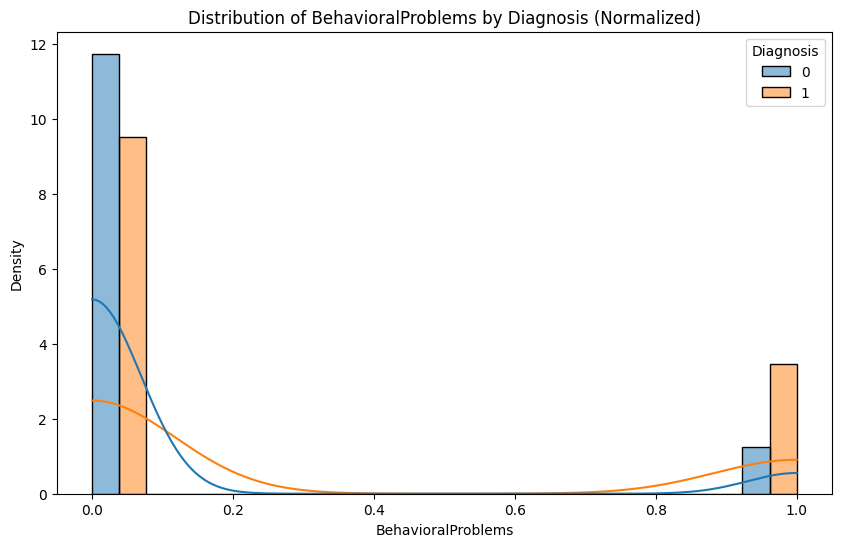

ADL


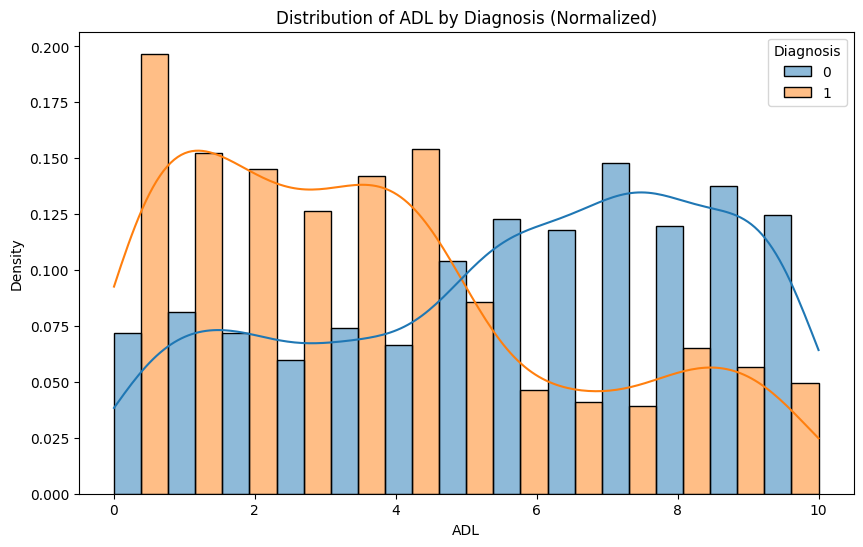

In [11]:
# Criando os gráficos com proporções relativas
cols = ['SleepQuality', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL']
for col in cols:
    plt.figure(figsize=(10, 6))
    print(col)
    sns.histplot( data=df, x=col, hue='Diagnosis', kde=True, stat='density', common_norm=False,  multiple='dodge' )
    plt.title(f'Distribution of {col} by Diagnosis (Normalized)')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

## 2.5 Análise de Correlação

In [12]:
# Colunas de interesse
columns = df.columns
# Plotando gráficos
sns.pairplot(df, hue='Diagnosis')
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b849516d3f0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b849516c670> (for post_execute):


KeyboardInterrupt: 

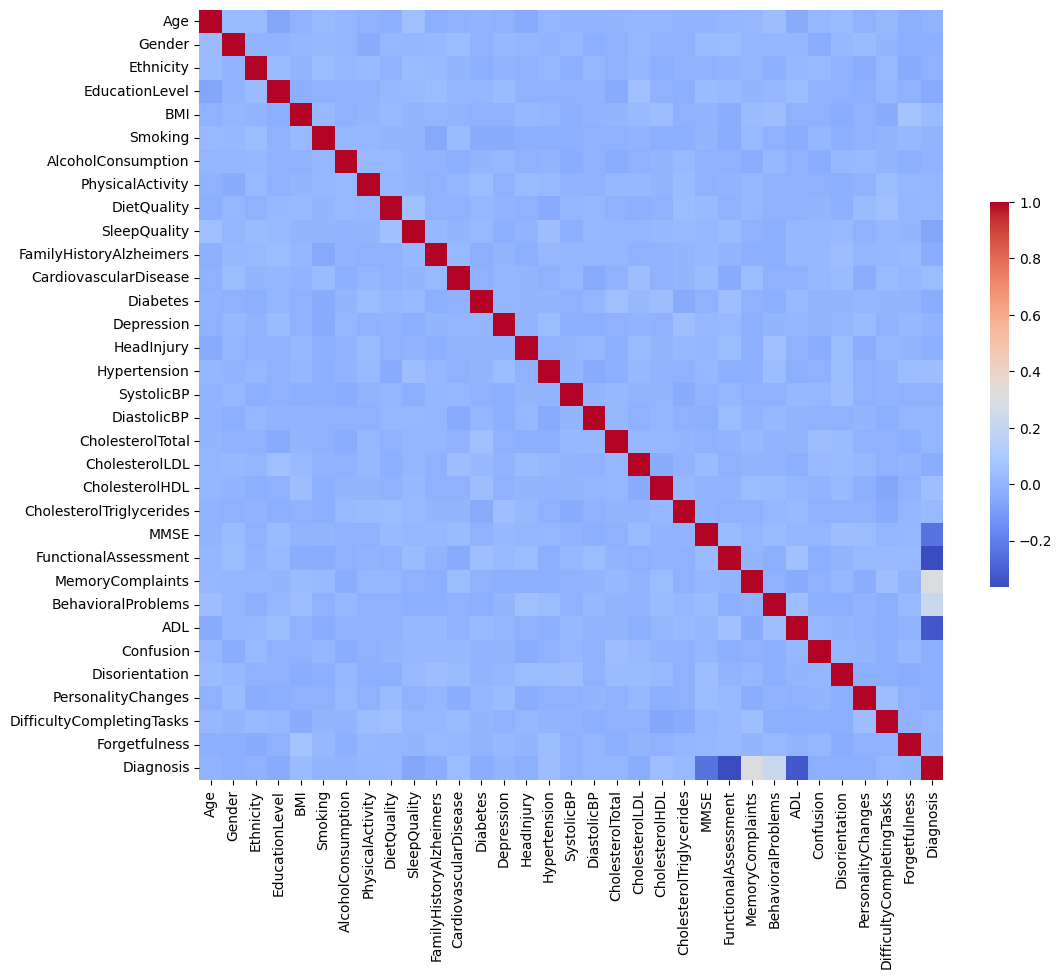

In [12]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", cbar_kws={"shrink": .5})
plt.show()

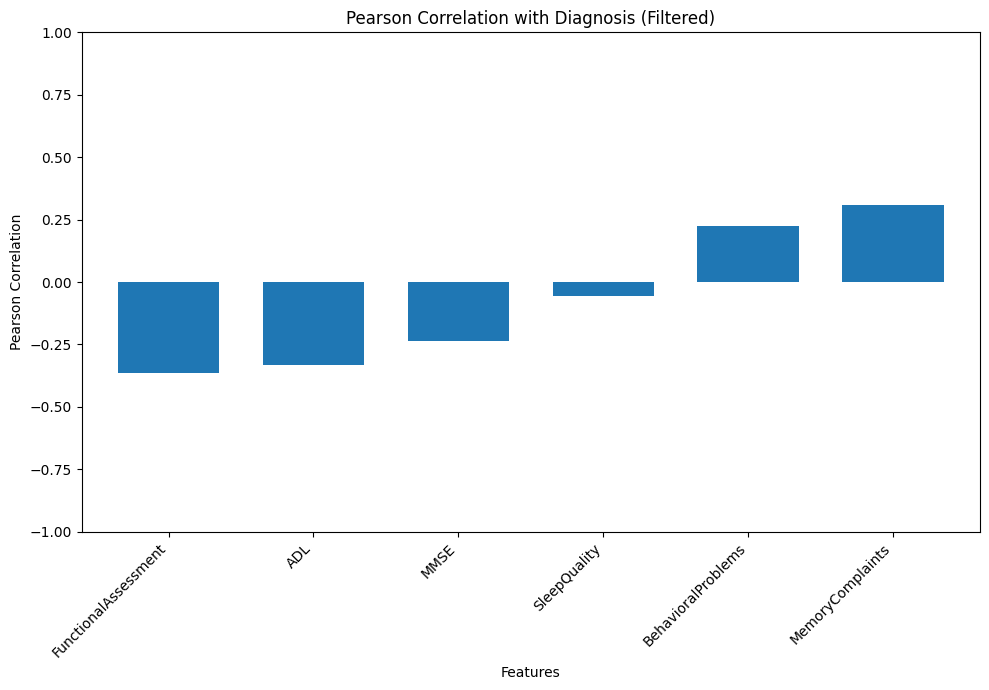

In [13]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['Diagnosis'][:-1].sort_values()

# Filtrando as correlações com valor absoluto maior que
correlations_filtered = correlations[correlations.abs() > 0.05]

# Set the size of the figure
plt.figure(figsize=(10, 7))

# Create a bar plot of the filtered Pearson correlation coefficients
ax = correlations_filtered.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Diagnosis (Filtered)')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations_filtered.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## 2.6 Proposta de solução sem ML

Temos evidencias que essas 6 colunas são as que estão mais correlacionadas com o diagnóstico

Vamos tentar criar algumas regras que definem o que é alzeimer ou não

In [14]:
df_aux = df[['FunctionalAssessment', 'ADL', 'MMSE', 'SleepQuality','BehavioralProblems', 'MemoryComplaints', 'Diagnosis']].copy()
df_aux[df_aux.Diagnosis==0].describe()

,FunctionalAssessment,ADL,MMSE,SleepQuality,BehavioralProblems,MemoryComplaints,Diagnosis
count,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.000000,1389.0
mean,5.860669,5.707951,16.265543,7.124832,0.096472,0.115911,0.0
std,2.761000,2.826502,8.933233,1.764196,0.295344,0.320233,0.0
min,0.011898,0.014691,0.005312,4.002629,0.000000,0.000000,0.0
25%,3.850641,3.402695,8.545490,5.564564,0.000000,0.000000,0.0
50%,6.244300,6.135120,17.145797,7.238501,0.000000,0.000000,0.0
75%,8.121256,7.998984,24.595710,8.645183,0.000000,0.000000,0.0
max,9.996467,9.999747,29.991381,9.999840,1.000000,1.000000,0.0


In [15]:
df_aux[df_aux.Diagnosis==1].describe()

,FunctionalAssessment,ADL,MMSE,SleepQuality,BehavioralProblems,MemoryComplaints,Diagnosis
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.0
mean,3.653380,3.657938,11.994657,6.916292,0.267105,0.376316,1.0
std,2.566685,2.700909,7.225532,1.755597,0.442739,0.484780,0.0
min,0.000460,0.001288,0.050624,4.006171,0.000000,0.000000,1.0
25%,1.576868,1.425180,6.040483,5.340061,0.000000,0.000000,1.0
50%,3.299060,3.235750,11.565835,6.912164,0.000000,0.000000,1.0
75%,4.920710,5.026479,18.151993,8.411609,1.000000,1.000000,1.0
max,9.927945,9.945036,29.959425,9.997627,1.000000,1.000000,1.0


In [17]:
def predict_diagnosis_voting(row):
    votes = 0

    # Aplicando cada regra e contando votos
    if row['ADL'] < 3.65:
        votes += 1
    if row['FunctionalAssessment'] < 5:
        votes += 1
    if row['MMSE'] < 14:
        votes += 1
    if row['BehavioralProblems'] >= 0.5:
        votes += 1
    if row['MemoryComplaints'] >= 0.3:
        votes += 1
    if row['SleepQuality'] < 7:
        votes += 1

    # Verificando o número de votos
    if votes >= 3:  # Se a maioria das regras sugerirem Diagnosis = 1
        return 1
    else:
        return 0

# Aplicando a função ao DataFrame
df_aux['PredictedDiagnosis'] = df_aux.apply(predict_diagnosis_voting, axis=1)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Supondo que 'Diagnosis' seja a coluna real e 'PredictedDiagnosis' seja a coluna predita
y_true = df_aux['Diagnosis']
y_pred = df_aux['PredictedDiagnosis']

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculando as métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Exibindo os resultados
print(f'Matriz de Confusão:\n{conf_matrix}')
print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Matriz de Confusão:
[[1135  254]
 [ 201  559]]
Acurácia: 0.7883
Precisão: 0.6876
Recall: 0.7355
F1 Score: 0.7107


#3. Uso de ML para ajudar no Diagnóstico

## 3.1 Definindo grupos de variáveis

In [19]:
gr_correlacionadas = ['FunctionalAssessment', 'ADL', 'MMSE', 'SleepQuality','BehavioralProblems', 'MemoryComplaints']
gr_demographic = ['Age', 'Gender', 'Ethnicity', 'EducationLevel']
gr_lifestyle = [ 'BMI', 'Smoking','AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality']
gr_medical = ['FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension']
gr_clinical = ['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides']
gr_cognitive = ['MMSE', 'FunctionalAssessment','MemoryComplaints', 'BehavioralProblems', 'ADL']
gr_symptoms = ['Confusion','Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks','Forgetfulness']

##3.2 Definindo Metodologia de Avaliação

$$
\text{Matriz de Confusão:}
$$

$$
\begin{pmatrix}
\text{TN} & \text{FP} \\
\text{FN} & \text{TP} \\
\end{pmatrix}
=
\begin{pmatrix}
1135 & 254 \\
201 & 559 \\
\end{pmatrix}
$$

$$
\text{Acurácia: } 0.7883
$$

$$
\text{Precisão: } 0.6876
$$

$$
\text{Recall: } 0.7355
$$

$$
\text{F1 Score: } 0.7107
$$



In [20]:
def modelagem(X,y):
  resultados = pd.DataFrame()
  #Modelo
  mol = RandomForestClassifier()

  # Dados desbalanceados exigem uma reamostragem estratificada
  validacao = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)

  mol_cross = cross_validate(mol, X, y, cv = validacao, scoring = ['accuracy', 'recall', 'f1', 'precision'],verbose = 1, n_jobs = -1, return_train_score=True)

  dic = {'accuracy': [mol_cross['train_accuracy'].mean()],'F1-Score': [mol_cross['train_f1'].mean()], 'Precisão': [mol_cross['train_precision'].mean()], 'Recall': [mol_cross['train_recall'].mean()]}
  resultados = pd.concat([resultados, pd.DataFrame(dic, index = ['Treino'])])
  dic = {'accuracy': [mol_cross['test_accuracy'].mean()],'F1-Score': [mol_cross['test_f1'].mean()], 'Precisão': [mol_cross['test_precision'].mean()], 'Recall': [mol_cross['test_recall'].mean()]}
  resultados = pd.concat([resultados, pd.DataFrame(dic, index = ['Teste'])])
  display(resultados)

  return resultados

## 3.3 Testando Hipóteses

In [21]:
def testa_hip(colunas, df, hipotese=''):
  print(f'Estamos testando a Hipótese que as colunas: {hipotese} são suficientes')
  df = df.copy()
  X = df[colunas]
  y = df['Diagnosis']

  #Chamando nosso modelo de validação
  resultados = modelagem(X,y)
  resultados['hipotese'] = hipotese
  resultados = resultados.reset_index().rename(columns={'index':'etapa'})

  return resultados

In [23]:
resultado_consolidado = pd.DataFrame()

result = testa_hip(colunas=gr_correlacionadas, df=df, hipotese='Colunas Correlacionadas')
resultado_consolidado = pd.concat([resultado_consolidado, result])

Estamos testando a Hipótese que as colunas: Colunas Correlacionadas são suficientes


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   50.8s finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.999964,0.999949,0.999985,0.999912
Teste,0.952677,0.931798,0.949659,0.915526


In [24]:
result = testa_hip(colunas=gr_demographic, df=df, hipotese='Demograficas')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_lifestyle, df=df, hipotese='Estilo Vida')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_medical, df=df, hipotese='Dados Medicos')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_clinical, df=df, hipotese='Clinico')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_cognitive, df=df, hipotese='Cognitivo')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_symptoms, df=df, hipotese='Sintomas')
resultado_consolidado = pd.concat([resultado_consolidado, result])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Demograficas são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.8s finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.756936,0.600055,0.717838,0.515950
Teste,0.562068,0.290175,0.341094,0.254342


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Estilo Vida são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.999995,0.999993,1.000000,0.999985
Teste,0.607678,0.141141,0.314239,0.091842


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Dados Medicos são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   26.0s finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.653653,0.097787,0.623880,0.053231
Teste,0.642018,0.068803,0.447779,0.037763


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Clinico são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


,accuracy,F1-Score,Precisão,Recall
Treino,1.000000,1.000000,1.000000,1.000000
Teste,0.622061,0.159583,0.374497,0.102237


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Cognitivo são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   46.4s finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.999948,0.999927,0.999956,0.999898
Teste,0.951838,0.930784,0.946926,0.915921


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Sintomas são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   21.9s finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.647402,0.021326,0.592109,0.010994
Teste,0.641786,0.007746,0.127702,0.004079


In [25]:
result = testa_hip(colunas=gr_demographic, df=df, hipotese='Dem')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_demographic+gr_lifestyle, df=df, hipotese='Dem/Vid')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_demographic+gr_lifestyle+gr_medical, df=df, hipotese='Dem/Vid/Med')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_demographic+gr_lifestyle+gr_medical+gr_clinical, df=df, hipotese='Dem/Vid/Med/Cli')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_demographic+gr_lifestyle+gr_medical+gr_clinical+gr_cognitive, df=df, hipotese='Dem/Vid/Med/Cli/Cog')
resultado_consolidado = pd.concat([resultado_consolidado, result])

result = testa_hip(colunas=gr_demographic+gr_lifestyle+gr_medical+gr_clinical+gr_cognitive+gr_symptoms, df=df, hipotese='Dem/Vid/Med/Cli/Cog/Sin')
resultado_consolidado = pd.concat([resultado_consolidado, result])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Dem são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.8s finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.756786,0.599160,0.718435,0.514371
Teste,0.558359,0.280809,0.331055,0.245395


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Dem/Vid são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


,accuracy,F1-Score,Precisão,Recall
Treino,1.000000,1.000000,1.000000,1.000000
Teste,0.616381,0.108892,0.306446,0.066974


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Dem/Vid/Med são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


,accuracy,F1-Score,Precisão,Recall
Treino,1.00000,1.00000,1.000000,1.000000
Teste,0.62652,0.10408,0.349246,0.062105


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Dem/Vid/Med/Cli são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.4min finished


,accuracy,F1-Score,Precisão,Recall
Treino,1.000000,1.000000,1.000000,1.000000
Teste,0.636901,0.073585,0.375719,0.041184


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Dem/Vid/Med/Cli/Cog são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.999990,0.999985,1.000000,0.999971
Teste,0.947837,0.924057,0.950369,0.900000


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Estamos testando a Hipótese que as colunas: Dem/Vid/Med/Cli/Cog/Sin são suficientes


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


,accuracy,F1-Score,Precisão,Recall
Treino,0.999990,0.999985,0.999985,0.999985
Teste,0.940952,0.912965,0.951242,0.878421


In [ ]:
result_aval = resultado_consolidado[resultado_consolidado.etapa=='Teste'].sort_values(by='F1-Score', ascending=False).copy()
result_aval

,etapa,accuracy,F1-Score,Precisão,Recall,hipotese
1,Teste,0.952534,0.931597,0.948860,0.915789,Colunas Correlacionadas
1,Teste,0.952163,0.930961,0.948041,0.915526,Cognitivo
1,Teste,0.946442,0.921708,0.950905,0.895263,Dem/Vid/Med/Cli/Cog
1,Teste,0.940297,0.911961,0.951020,0.876974,Dem/Vid/Med/Cli/Cog/Sin
1,Teste,0.563101,0.284178,0.339113,0.246447,Dem
1,Teste,0.560263,0.284029,0.334701,0.248026,Demograficas
1,Teste,0.618150,0.153800,0.360752,0.098947,Clinico
1,Teste,0.607213,0.141348,0.314927,0.092105,Estilo Vida
1,Teste,0.617588,0.101745,0.301558,0.061842,Dem/Vid
1,Teste,0.623549,0.094822,0.317966,0.056316,Dem/Vid/Med


# 4. Refinando os Hiperparâmetros do modelo

In [ ]:
X = df[gr_correlacionadas]
y = df['Diagnosis']

In [ ]:
from sklearn.model_selection import GridSearchCV

validacao = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
mol = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 200],  # Número de árvores na floresta
    'max_depth': [None, 10],  # Profundidade máxima da árvore
    'min_samples_split': [5, 10],  # Número mínimo de amostras necessárias para dividir um nó
    'max_features': ['auto', 'sqrt', 'log2'],  # Número de recursos a serem considerados para a melhor divisão
    'bootstrap': [True, False]  # Se deve usar amostragem bootstrap ao construir árvores
}

grid_search = GridSearchCV(estimator=mol, param_grid=param_grid, scoring=['accuracy', 'recall', 'f1', 'precision'], refit='f1',
                           cv=validacao, verbose=10, n_jobs=-1)

grid_search.fit(X, y)

Fitting 25 folds for each of 48 candidates, totalling 1200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 200]},
             refit='f1', scoring=['accuracy', 'recall', 'f1', 'precision'],
             verbose=10)

In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}
Best F1 score:  0.9322491748696053


# 5. Variáveis que mais impactaram o DIagnóstico

In [ ]:
rf = RandomForestClassifier(bootstrap= True, max_depth=10, max_features='log2', min_samples_split=10, n_estimators=200)

rf.fit(X,y)

RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=10,
                       n_estimators=200)

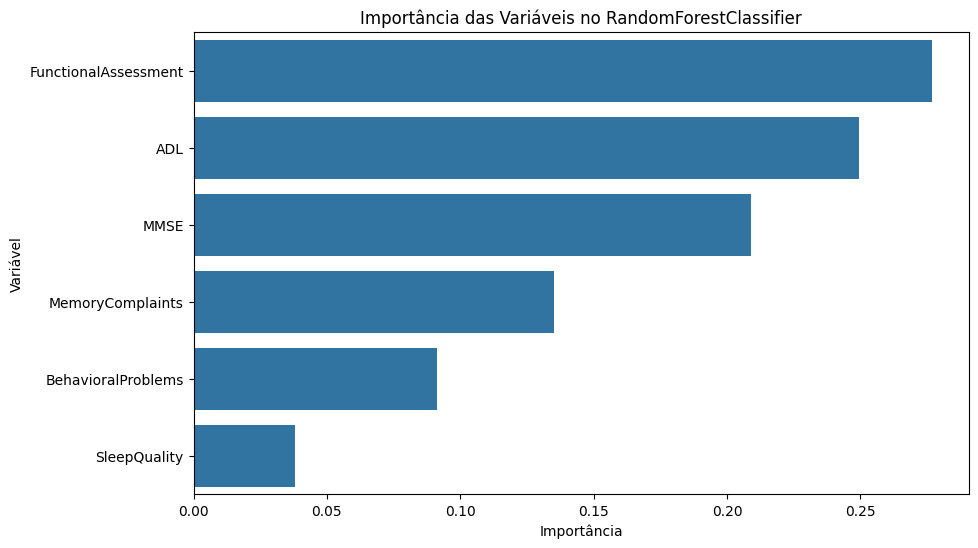

In [ ]:
feature_importances = rf.feature_importances_

# Cria uma tabela com as variáveis e suas importâncias
importance_df = pd.DataFrame({
    'Feature': X.columns,  # Supondo que X é o DataFrame com as variáveis preditoras
    'Importance': feature_importances
})

# Ordena as variáveis pela importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotar as importâncias das variáveis
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)

# Configurações do gráfico
plt.title('Importância das Variáveis no RandomForestClassifier')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

### Insight de negocio
Como vemos ainda temos a relação de algumas variáveis mais importantes que outras, mas o conjunto delas que tem a melhor predição. Para  o Negócio podemos levar essa informação de forma que essas variáveis devem ter maior criticidade nos diagnósticos, fazer exames mais precisos, repetir eles, dar um foco para ter essas variaveis o mais fieis possiveis

Avaliações Cognitivas e Funcionais

    
    
    FunctionalAssessment: Pontuação da avaliação funcional, variando de 0 a 10. Pontuações mais baixas indicam maior comprometimento.
    
    ADL: Pontuação das Atividades da Vida Diária, variando de 0 a 10. Pontuações mais baixas indicam maior comprometimento.

    MMSE: Pontuação do Mini-Exame do Estado Mental, variando de 0 a 30. Pontuações mais baixas indicam comprometimento cognitivo.
    
    MemoryComplaints: Presença de queixas de memória, onde 0 indica Não e 1 indica Sim.
    
    BehavioralProblems: Presença de problemas comportamentais, onde 0 indica Não e 1 indica Sim.
    
    

# 6. Conclusão

- Conseguimos identificar com a análise gráfica aspectos importantes do nosso problema;
- Desmistificamos o senso comum com base nos dados, quebrando alguns paradgmas que a área de negócio muitas vezes tem;
- Tomamos a dianteira em nossa análise encontrando e provando que algumas variáveis são muito mais importantes que outras no diagnóstico de Alzheimer;
- Com algumas estatísticas básicas, conseguimos criar regras para detectar grupos de pacientes doentes em um MvP sem o uso de ML;
- Em um ponto mais avançado, usamos algoritimos de aprendizagem para aprimorar nosso modelo, chegando a mais de 90% de assertividade;
- Identificamos os grupos de variaveis suficientes para nossas predições, descartando testes e informações que não agregam para a resolução do nosso problema;
- Isso significa uma redução de custos com exames e um menor tempo para o diagnóstico, além de uma experiência melhor para o paciênte, que não precisa passar todo seu histórico detalhado para a equipe médica;
- Por fim, fizemos ajustes finos no nosso modelo para ser o mais assertivo possível no problema desbalanceado.
- levamos para o negócio os testes/variaveis que devem ter a maior qualidade possivel para o diagnóstico.


## Próximos passos:

- Alimentar o modelo com mais dados e avaliar as métricas;
- Testar outros algoritimos para ver se tem uma performance/interpretação diferentes;
- Fazer agrupamento dos pacientes, buscando caracteristicas comuns;
- Trabalhar em cima desses grupos, com uma nova modelagem.
